In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons

from micrograd import Value
from nn import MLP

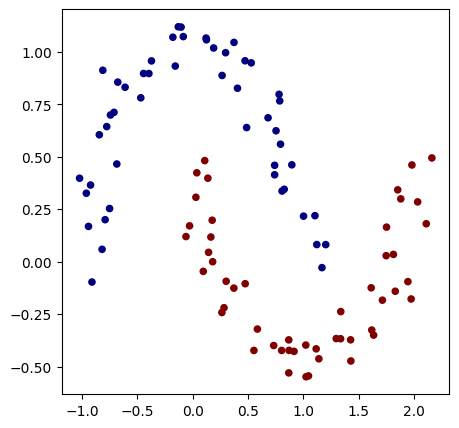

In [2]:
# make up a dataset
X, y = make_moons(n_samples=100, noise=0.1)

y = y * 2 - 1  # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap="jet")

In [3]:
# init the MLP model

model = MLP(2, [16, 16, 1])
print(model, "number of params", len(model.parameters()))

<nn.MLP object at 0x1080c97f0> number of params 337


In [4]:
# loss function


def loss(batch_size: int | None = None): ...

In [5]:
# optimisation
for k in range(100):
    ...

step 0 loss Value(data=1.1815924818239036, label=), accuracy 50.0%
step 1 loss Value(data=1.181266561904467, label=), accuracy 50.0%
step 2 loss Value(data=1.180943748477596, label=), accuracy 50.0%
step 3 loss Value(data=1.180624036751873, label=), accuracy 50.0%
step 4 loss Value(data=1.1803074219837602, label=), accuracy 50.0%
step 5 loss Value(data=1.1799938994774728, label=), accuracy 50.0%
step 6 loss Value(data=1.179683464584864, label=), accuracy 50.0%
step 7 loss Value(data=1.179376112705294, label=), accuracy 50.0%
step 8 loss Value(data=1.179071839285515, label=), accuracy 50.0%
step 9 loss Value(data=1.1787706398195545, label=), accuracy 50.0%
step 10 loss Value(data=1.1784725098485904, label=), accuracy 50.0%
step 11 loss Value(data=1.1781774449608404, label=), accuracy 50.0%
step 12 loss Value(data=1.1778854407914454, label=), accuracy 50.0%
step 13 loss Value(data=1.177596493022356, label=), accuracy 50.0%
step 14 loss Value(data=1.1773105973822175, label=), accuracy 50.

(-1.548639298268643, 1.951360701731357)

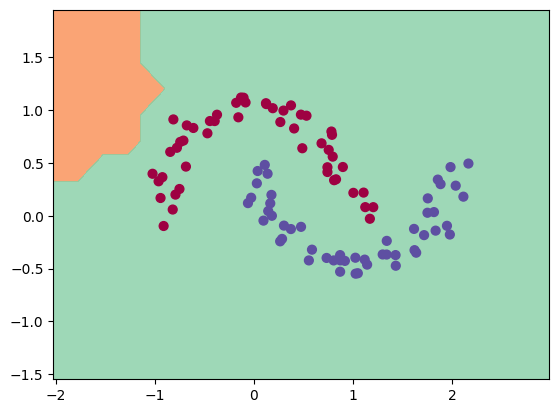

In [6]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())